>Q1: The Civilian Complaint Review Board (CCRB) of New York City releases anonymized data about complaints it has received reguarding civilian interactions with police. Besides their aggregated reporting data, they release record-level data as an Excel spreadsheet. Download this data. A description of the data appears in the first sheet of the spreadsheet, which could be useful to your analysis. 

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import seaborn as sns

In [4]:
ccrb = pd.read_csv('/Users/jAir/Desktop/Research/thinkful/datasets/ccrb_data.csv')

> How many unique complaints (identified by 'UniqueComplaintId') with complete information (i.e. there are no missing values) appear in the dataset?

In [5]:
ccrb.describe()

,UniqueComplaintId,Close Year,Received Year,Incident Year
count,206718.000,206718.000,206718.000,206718.000
mean,35213.534,2010.471,2009.886,2009.855
std,20297.667,3.162,3.252,3.251
min,1.000,2006.000,1999.000,1999.000
25%,17578.000,2008.000,2007.000,2007.000
50%,35261.500,2010.000,2009.000,2009.000
75%,52825.750,2013.000,2013.000,2012.000
max,70245.000,2017.000,2017.000,2017.000


In [6]:
ccrb

,DateStamp,UniqueComplaintId,Close Year,Received Year,Borough of Occurrence,Is Full Investigation,Complaint Has Video Evidence,Complaint Filed Mode,Complaint Filed Place,Complaint Contains Stop & Frisk Allegations,Incident Location,Incident Year,Encounter Outcome,Reason For Initial Contact,Allegation FADO Type,Allegation Description
0,02/07/2017,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,02/07/2017,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)
5,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Question and/or stop
6,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Threat of arrest
7,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Abuse of Authority,Threat of arrest
8,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Word
9,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Action


In [7]:
list(ccrb)

['DateStamp',
 'UniqueComplaintId',
 'Close Year',
 'Received Year',
 'Borough of Occurrence',
 'Is Full Investigation',
 'Complaint Has Video Evidence',
 'Complaint Filed Mode',
 'Complaint Filed Place',
 'Complaint Contains Stop & Frisk Allegations',
 'Incident Location',
 'Incident Year',
 'Encounter Outcome',
 'Reason For Initial Contact',
 'Allegation FADO Type',
 'Allegation Description']

In [8]:
ccrb.rename(columns={'DateStamp':'datestamp',
 'UniqueComplaintId':'unique_complaint_id',
 'Close Year':'close_year',
 'Received Year': 'received_year',
 'Borough of Occurrence': 'borough_of_occurrence',
 'Is Full Investigation': 'is_full_investigation',
 'Complaint Has Video Evidence': 'complaint_has_video_evidence',
 'Complaint Filed Mode': 'complaint_filed_mode',
 'Complaint Filed Place': 'complaint_filed_place',
 'Complaint Contains Stop & Frisk Allegations': 'complaint_contains_stop_frisk_allegations',
 'Incident Location': 'incident_location',
 'Incident Year': 'incident_year',
 'Encounter Outcome': 'encounter_outcome',
 'Reason For Initial Contact': 'reason_for_initial_contact',
 'Allegation FADO Type': 'allegation_fado_type',
 'Allegation Description': 'allegation_description'}, inplace=True)

In [9]:
ccrb

,datestamp,unique_complaint_id,close_year,received_year,borough_of_occurrence,is_full_investigation,complaint_has_video_evidence,complaint_filed_mode,complaint_filed_place,complaint_contains_stop_frisk_allegations,incident_location,incident_year,encounter_outcome,reason_for_initial_contact,allegation_fado_type,allegation_description
0,02/07/2017,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,02/07/2017,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)
5,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Question and/or stop
6,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Threat of arrest
7,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Abuse of Authority,Threat of arrest
8,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Word
9,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Action


In [10]:
ccrb.isnull().sum()

datestamp                                       0
unique_complaint_id                             0
close_year                                      0
received_year                                   0
borough_of_occurrence                         502
is_full_investigation                           0
complaint_has_video_evidence                    0
complaint_filed_mode                            0
complaint_filed_place                           0
complaint_contains_stop_frisk_allegations       0
incident_location                            3369
incident_year                                   0
encounter_outcome                               0
reason_for_initial_contact                    878
allegation_fado_type                            3
allegation_description                          3
dtype: int64

In [11]:
ccrb_comp = ccrb.dropna()

In [12]:
ccrb_comp.isnull().sum()

datestamp                                    0
unique_complaint_id                          0
close_year                                   0
received_year                                0
borough_of_occurrence                        0
is_full_investigation                        0
complaint_has_video_evidence                 0
complaint_filed_mode                         0
complaint_filed_place                        0
complaint_contains_stop_frisk_allegations    0
incident_location                            0
incident_year                                0
encounter_outcome                            0
reason_for_initial_contact                   0
allegation_fado_type                         0
allegation_description                       0
dtype: int64

In [13]:
ccrb_comp.describe()

,unique_complaint_id,close_year,received_year,incident_year
count,202390.000,202390.000,202390.000,202390.000
mean,35200.959,2010.482,2009.895,2009.864
std,20302.568,3.163,3.253,3.252
min,1.000,2006.000,1999.000,1999.000
25%,17539.000,2008.000,2007.000,2007.000
50%,35242.000,2010.000,2009.000,2009.000
75%,52834.750,2013.000,2013.000,2013.000
max,70245.000,2017.000,2017.000,2017.000


In [14]:
ccrb_comp['complaint_contains_stop_frisk_allegations'] = pd.get_dummies(ccrb_comp['complaint_contains_stop_frisk_allegations'])



/Users/jAir/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
ccrb_comp.head()

,datestamp,unique_complaint_id,close_year,received_year,borough_of_occurrence,is_full_investigation,complaint_has_video_evidence,complaint_filed_mode,complaint_filed_place,complaint_contains_stop_frisk_allegations,incident_location,incident_year,encounter_outcome,reason_for_initial_contact,allegation_fado_type,allegation_description
0,02/07/2017,6,2006,2006,Brooklyn,False,False,Phone,IAB,1,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,02/07/2017,11,2006,2006,Bronx,False,False,Phone,IAB,1,Street/highway,2006,Arrest,Other,Force,Physical force
2,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)


> How many unique complaints (identified by 'UniqueComplaintId') with complete information (i.e. there are no missing values) appear in the dataset?

> 202390.000000

> What proportion of complaints occur in the borough with the largest number of complaints? For this question, only consider unique complaints with complete information. 

> 0.3536736004743317

In [16]:
ccrb_comp.unique_complaint_id.groupby(ccrb['borough_of_occurrence']).count().max()/ccrb_comp.unique_complaint_id.count()

0.3536736004743317

> How many complaints per 100k residents were there in the borough with the highest number of complaints per capita resulting from incidents in 2016? Find the 2016 population estimates of each borough on Wikipedia. Ignore complaints from "Outside NYC". For this question, only consider unique complaints with complete information. 

>>2016

>>complaints per 100k

>>borough with highest number of complaints per capita

> 173.400582

In [17]:
boroughs = pd.DataFrame(ccrb_comp.unique_complaint_id[ccrb_comp.incident_year == 2016].groupby(ccrb['borough_of_occurrence']).count())

In [18]:
boroughs['population_2016'] = [1471160, 2648771, 1664727, 0, 2358582, 479458]
boroughs['complaints_per_100k'] = boroughs.unique_complaint_id/boroughs.population_2016*100000

In [19]:
pd.to_numeric(boroughs.population_2016)

borough_of_occurrence
Bronx            1471160
Brooklyn         2648771
Manhattan        1664727
Outside NYC            0
Queens           2358582
Staten Island     479458
Name: population_2016, dtype: int64

In [20]:
boroughs.dtypes

unique_complaint_id      int64
population_2016          int64
complaints_per_100k    float64
dtype: object

In [21]:
boroughs

,unique_complaint_id,population_2016,complaints_per_100k
borough_of_occurrence,,,
Bronx,2551,1471160,173.401
Brooklyn,3174,2648771,119.829
Manhattan,2285,1664727,137.260
Outside NYC,12,0,inf
Queens,1626,2358582,68.940
Staten Island,477,479458,99.487


> What is the average number of years it takes for a complaint to be closed? For this question, only consider unique complaints with complete information. 

> 0.5874697366470676

In [22]:
ccrb_comp.head()

,datestamp,unique_complaint_id,close_year,received_year,borough_of_occurrence,is_full_investigation,complaint_has_video_evidence,complaint_filed_mode,complaint_filed_place,complaint_contains_stop_frisk_allegations,incident_location,incident_year,encounter_outcome,reason_for_initial_contact,allegation_fado_type,allegation_description
0,02/07/2017,6,2006,2006,Brooklyn,False,False,Phone,IAB,1,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,02/07/2017,11,2006,2006,Bronx,False,False,Phone,IAB,1,Street/highway,2006,Arrest,Other,Force,Physical force
2,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)


In [23]:
(ccrb_comp.close_year-ccrb_comp.received_year).sum()/(ccrb_comp.unique_complaint_id.count())

0.5874697366470676

> Complaints about stop and frisk have been declining. Use linear regression from the year complaints about stop and frisk peaked through 2016 (inclusive) to predict how many stop and frisk incidents in 2018 will eventually lead to a complaint. For this question, only consider unique complaints with complete information. Remember that the count of complaints must be an integer (round to nearest). 

> peak year 2007

> 2018 prediction 7478.83333333

In [24]:
type(ccrb_comp.complaint_contains_stop_frisk_allegations.groupby(ccrb_comp.incident_year).count())

pandas.core.series.Series

In [25]:
# turn into dataframe, drop 1999-2006 and 2017
# y = year
# x = number of complaints

sandf = pd.DataFrame(ccrb_comp.complaint_contains_stop_frisk_allegations.groupby(ccrb_comp.incident_year).sum())
sandf = sandf.reset_index()
sandf = sandf.iloc[6:16,:]

In [26]:
sandf

,incident_year,complaint_contains_stop_frisk_allegations
6,2007,12602.000
7,2008,12201.000
8,2009,11948.000
9,2010,10191.000
10,2011,9805.000
11,2012,9430.000
12,2013,9242.000
13,2014,9068.000
14,2015,8160.000
15,2016,6707.000


In [27]:
total_incidents = ccrb_comp.groupby(['incident_year']).size().reset_index(name='counts')
total_incidents = total_incidents.reset_index()
sandf['total_incidents'] = total_incidents['counts'].iloc[6:16]

Coefficients: 
 [[-1412.27272727]]
Intercept: 
 [2857372.09090909]


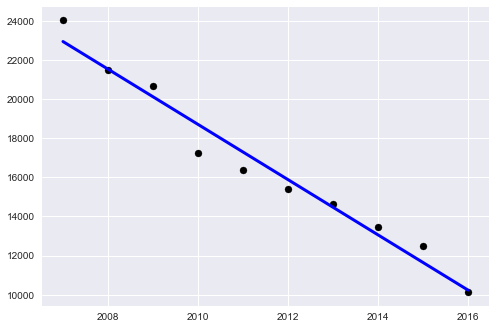

X=[2018], Predicted=[7405.72727273]


In [30]:
X = sandf.incident_year.values.reshape(-1,1)
y = sandf.total_incidents.values.reshape(-1,1)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(X, y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

X_predict = [[2018]]
y_predict = regr.predict(X_predict)
print("X=%s, Predicted=%s" % (X_predict[0], y_predict[0]))

In [31]:
sandf

,incident_year,complaint_contains_stop_frisk_allegations,total_incidents
6,2007,12602.000,24020
7,2008,12201.000,21464
8,2009,11948.000,20689
9,2010,10191.000,17243
10,2011,9805.000,16364
11,2012,9430.000,15399
12,2013,9242.000,14639
13,2014,9068.000,13442
14,2015,8160.000,12470
15,2016,6707.000,10125


In [32]:
X = sandf.drop(['complaint_contains_stop_frisk_allegations'], axis=1).values
y = sandf.complaint_contains_stop_frisk_allegations.values.reshape(-1,1)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


X_predict = [[2018, 7406]]
y_predict = regr.predict(X_predict)
print("X=%s, Predicted=%s" % (X_predict[0], y_predict[0]))

Coefficients: 
 [[-21.81321511   0.40924716]]
Intercept: 
 [47025.11341754]
X=[2018, 7406], Predicted=[6036.92979468]


In [33]:
ccrb

,datestamp,unique_complaint_id,close_year,received_year,borough_of_occurrence,is_full_investigation,complaint_has_video_evidence,complaint_filed_mode,complaint_filed_place,complaint_contains_stop_frisk_allegations,incident_location,incident_year,encounter_outcome,reason_for_initial_contact,allegation_fado_type,allegation_description
0,02/07/2017,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,02/07/2017,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)
5,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Question and/or stop
6,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Threat of arrest
7,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Abuse of Authority,Threat of arrest
8,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Word
9,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Action


In [34]:
list(ccrb_comp)

['datestamp',
 'unique_complaint_id',
 'close_year',
 'received_year',
 'borough_of_occurrence',
 'is_full_investigation',
 'complaint_has_video_evidence',
 'complaint_filed_mode',
 'complaint_filed_place',
 'complaint_contains_stop_frisk_allegations',
 'incident_location',
 'incident_year',
 'encounter_outcome',
 'reason_for_initial_contact',
 'allegation_fado_type',
 'allegation_description']

In [94]:
ccrb_model = ccrb_comp[[
 'close_year',
 'received_year',
 'borough_of_occurrence',
 'is_full_investigation',
 'complaint_has_video_evidence',
 'complaint_filed_mode',
 'complaint_filed_place',
 'complaint_contains_stop_frisk_allegations',
 'incident_location',
 'incident_year',
 'encounter_outcome',
]]

In [95]:
ccrb_model[['is_full_investigation', 'complaint_has_video_evidence']] = ccrb_model[['is_full_investigation', 'complaint_has_video_evidence']].astype(int)


/Users/jAir/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [96]:
ccrb_model.head()

,close_year,received_year,borough_of_occurrence,is_full_investigation,complaint_has_video_evidence,complaint_filed_mode,complaint_filed_place,complaint_contains_stop_frisk_allegations,incident_location,incident_year,encounter_outcome
0,2006,2006,Brooklyn,0,0,Phone,IAB,1,Street/highway,2006,No Arrest or Summons
1,2006,2006,Bronx,0,0,Phone,IAB,1,Street/highway,2006,Arrest
2,2006,2005,Bronx,0,0,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons
3,2006,2005,Bronx,0,0,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons
4,2006,2005,Bronx,0,0,Call Processing System,CCRB,0,Street/highway,2005,No Arrest or Summons


In [97]:
ccrb_model.dtypes

close_year                                    int64
received_year                                 int64
borough_of_occurrence                        object
is_full_investigation                         int64
complaint_has_video_evidence                  int64
complaint_filed_mode                         object
complaint_filed_place                        object
complaint_contains_stop_frisk_allegations     uint8
incident_location                            object
incident_year                                 int64
encounter_outcome                            object
dtype: object

In [98]:
ccrb_model = pd.get_dummies(data=ccrb_model, columns=['borough_of_occurrence','complaint_filed_mode','complaint_filed_place','incident_location','encounter_outcome'])


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [109]:
import time

t0 = time.time()

X = ccrb_model.drop('is_full_investigation', axis=1)
y = ccrb_model.is_full_investigation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

dt = DecisionTreeClassifier(criterion='entropy',max_depth=30)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred))

t1 = time.time()

total = t1-t0
print(total)

0.8237437620435792
0.804511092445279
2.335925817489624


In [110]:
from sklearn.ensemble import RandomForestClassifier

t2 = time.time()

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

t3 = time.time()

total2 = t3-t2
print(total2)

Accuracy: 0.5949651662631553
29.882174968719482
